# Coffee Shop Sales Analytics - EDA
### Nitin Reddy Manda 


## Introduction
Coffee Bliss is a popular, independently owned coffee shop, known for its high-quality coffee and cozy atmosphere. As the business grows, the owners recognize the need for data-driven decision-making to optimize sales, improve inventory management, and enhance the customer experience. By analyzing sales data, Coffee Bliss aims to uncover actionable insights that will drive growth and increase profitability.

## Key stakeholders

The main stakeholders in this project are:

* __Shop Owners:__ Looking to optimize sales strategies and increase profitability.
* __Marketing Team:__ Interested in understanding customer behavior and tailoring marketing efforts accordingly.
* __Operations Team:__ Aiming to improve inventory management and streamline operations

## Objectives
* __Analyze Sales Trends:__ Examine sales data to identify significant trends, patterns, and anomalies in transaction volumes, product popularity, and seasonal variations.
* __Understand Customer Behavior:__ Explore customer purchasing habits and preferences to better align offerings with customer needs.
* __Set KPIs:__ Define and monitor essential metrics like daily sales and average transaction value to track business performance.
* __Provide Actionable Insights:__ Offer insights and recommendations based on the EDA to help improve sales strategies and operational efficiency.

### Dataset
The dataset is publicly available through kaggle. This is the link to the [dataset](https://www.kaggle.com/datasets/ahmedabbas757/coffee-sales).


## Data Cleaning and Preparation

### Importing neccessary libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing data from the excel file
df = pd.read_excel(r'Coffee Shop Sales.xlsx', sheet_name = 'Transactions')
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,Revenue,Month,Month.1,Weekday,Weekday.1,Hour
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,1,Jan,7,Sun,7
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,1,Jan,7,Sun,7
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,1,Jan,7,Sun,7
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,1,Jan,7,Sun,7
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,1,Jan,7,Sun,7


let's look at the structure of the data and make sense of the columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
 11  Revenue           149116 non-null  float64       
 12  Month             149116 non-null  int64         
 13  Month.1           149116 non-null  object        
 14  Week

* The dataset appears well-structured with __no missing values__, which is excellent for analysis.

__Actions:__
   * We will remove the transaction_time, Month and Weekday columns from the dataset, as Hour, Month.1 and Weekday.1 provide more descriptive representations of the month and day of the week. We can also remove product_id and store_id as product_detail and store_location are better represnetations
   * Rename Month.1 and Weekday.1 for better readability.


In [ ]:
df.drop(columns=['transaction_time','store_id','Month','Weekday','product_id'], inplace = True )
df.rename(columns={'Month.1':'Month','Weekday.1':'Weekday'}, inplace = True)

* To gain an overview of the datasetâ€™s numerical features and understand their statistical properties, we'll use df.describe(). This will provide insights into measures such as the mean, standard deviation, and range for each numerical column.

In [7]:
df.describe()

,transaction_id,transaction_date,transaction_qty,unit_price,Revenue,Hour
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,3.382219,4.686367,11.735790
min,1.000000,2023-01-01 00:00:00,1.000000,0.800000,0.800000,6.000000
25%,37335.750000,2023-03-06 00:00:00,1.000000,2.500000,3.000000,9.000000
50%,74727.500000,2023-04-24 00:00:00,1.000000,3.000000,3.750000,11.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,3.750000,6.000000,15.000000
max,149456.000000,2023-06-30 00:00:00,8.000000,45.000000,360.000000,20.000000
std,43153.600016,NaN,0.542509,2.658723,4.227099,3.764662


* From transaction_date column we can say that all the records are from the year 2023 and are from months January to June only.
* Transaction Quantity: Varies from 1 to 8 units, with an average of 1.44 units.
* Unit Price(in dollars): Ranges from 0.80 to 45.00, averaging 3.38, indicating price variability.
* Revenue(in dollars): From 0.80 to 360.00, with an average of 4.69, reflecting diverse transaction values.

### Checking for duplicate values

In [9]:
df[df.duplicated()]

,transaction_id,transaction_date,transaction_qty,store_location,unit_price,product_category,product_type,product_detail,Revenue,Month,Weekday,Hour


* The empty dataframe indicates that there are no duplicate values.

### Checking for outliers

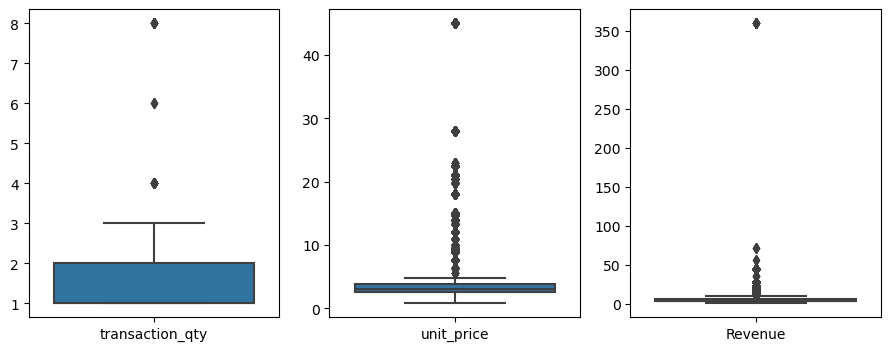

In [10]:
fig, ax = plt.subplots( 1,3 ,figsize = (11,4))
sns.boxplot(data = df[[ 'transaction_qty']], ax = ax[0])
sns.boxplot(data = df[[ 'unit_price' ]], ax = ax[1])
sns.boxplot(data = df[[ 'Revenue' ]], ax = ax[2])
plt.show()

* Outliers are present in the transaction quantity, unit price, and revenue columns. Domain knowledge is crucial for addressing these outliers effectively. 
* However, these outliers are justifiable given that high transaction quantities can lead to increased revenue, and premium items may have higher unit prices. Therefore, we will leave the outliers as they are, as they reflect realistic variations in the data.

## Exploratory Data Analyis

### Univariate Analysis

##### Let's look at revenue of each store over the year 2023

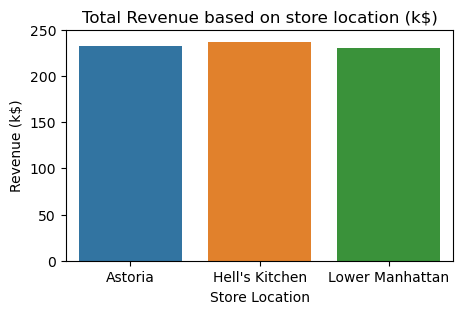

In [38]:
# grouping store locations with the total revenue earned by each store
df_revenue = df.groupby('store_location')['Revenue'].sum().reset_index()
# Dividing the Revenue by 1000 for easy representation in k dollars
df_revenue['Revenue'] = round(df_revenue['Revenue']/1000,2)

plt.figure(figsize=(5,3))
sns.barplot(x = 'store_location', y= 'Revenue', data = df_revenue)
plt.ylim(0,250)
plt.title('Total Revenue based on store location (k$)')
plt.xlabel('Store Location')
plt.ylabel('Revenue (k$)')
plt.show()

* This shows that the total revenue generated is quite similar across all stores, indicating that there isn't much variation in revenue performance between different locations.

#### Let's check how many units were commonly bought on each transaction


Text(0, 0.5, 'Transactions')

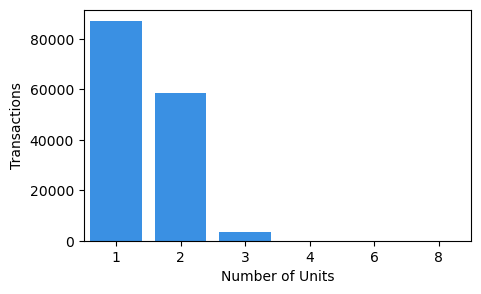

In [158]:
units_per_transaction = df.groupby('transaction_qty').size()
plt.figure(figsize=(5,3))
sns.barplot(x= units_per_transaction.index, y= units_per_transaction.values, color ='dodgerblue')
plt.xlabel('Number of Units')
plt.ylabel('Transactions')


* Most transactions involve only one or two items. 
* We have an opportunity to increase the number of items purchased per transaction by implementing strategies such as bundle discounts, volume-based pricing, or loyalty rewards for larger purchases.

#### Let's look at which category has the highest number of units sold

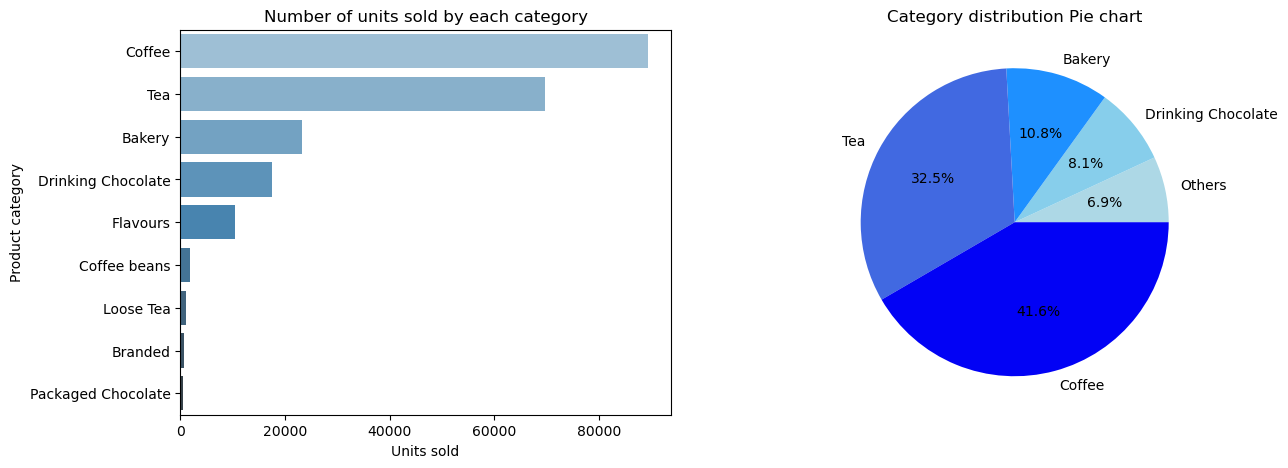

In [94]:
transaction_by_category = df.groupby('product_category')['transaction_qty'].sum().reset_index()
transaction_by_category = transaction_by_category[['product_category', 'transaction_qty']].sort_values(by='transaction_qty', ascending=False)

total = transaction_by_category['transaction_qty'].sum()
def categorize(row,total):
    perct = (row['transaction_qty']/total)*100
    return row['product_category'] if perct > 6 else 'Others'

transaction_by_category['category'] = transaction_by_category.apply(categorize,total = total,axis=1) 
pie_cat = transaction_by_category.groupby('category')['transaction_qty'].sum().sort_values()


fig , ax = plt.subplots(1,2, figsize = (12,5))
#plt.figure(figsize = (7,3))
sns.barplot(y='product_category', x= 'transaction_qty', data=transaction_by_category, orient='h', ax=ax[0], palette='Blues_d')
ax[0].set_title('Number of units sold by each category')
ax[0].set_ylabel('Product category')
ax[0].set_xlabel('Units sold')

colors = ['#ADD8E6', '#87CEEB', '#1E90FF', '#4169E1', '#0202F5']
ax[1].pie(pie_cat.values, labels = pie_cat.index,autopct='%1.1f%%', colors=colors)
ax[1].set_title('Category distribution Pie chart')
fig.subplots_adjust(left = 0.05, right = 0.95)
plt.show()

* Coffee is the most popular category, with the highest units sold and revenue generated, indicating a strong customer preference.
* Tea ranks second, showing significant sales and revenue, reflecting solid demand and interest.
* Bakery items come in third, with notable sales figures, though not as dominant as coffee or tea, suggesting a potential area for growth.

#### Unit price distribution among categories

Text(0.5, 1.0, 'Unit price distribution for Product categories')

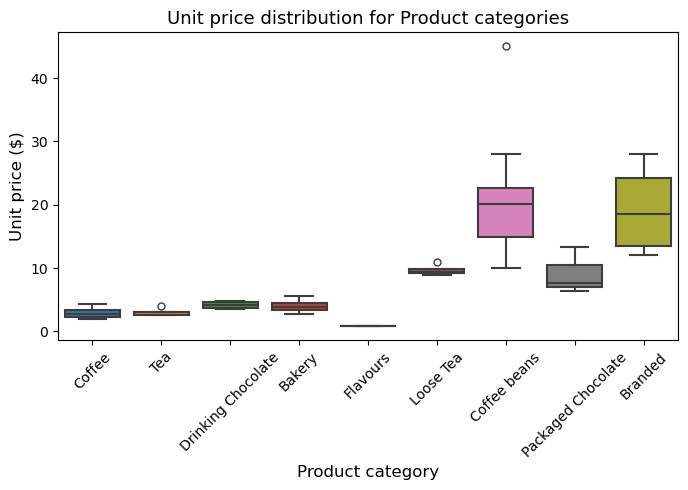

In [95]:
unique_prices = df.drop_duplicates(subset=['product_category','unit_price'])

fig , ax = plt.subplots(figsize=(8,4))

sns.boxplot(x = 'product_category', y='unit_price', data = unique_prices, flierprops = {'marker':'o','markerfacecolor':'none'})

plt.ylabel('Unit price ($)', fontsize= 12)
plt.xlabel('Product category', fontsize = 12)
plt.xticks(rotation = 45)
plt.title('Unit price distribution for Product categories', fontsize = 13)

* The analysis of unit prices reveals that products with the highest unit pricesâ€”such as loose tea, coffee beans, packaged chocolate, and branded itemsâ€”tend to have lower sales volumes. This indicates that higher-priced items are purchased less frequently compared to lower-priced products, which show more consistent sales.

* Coffee and tea, being lower-priced items, exhibit high sales volumes. To capitalize on this trend, focus on promoting these popular, high-turnover products while exploring opportunities to upsell or cross-sell higher-priced items to boost overall revenue.


### Bivariate Analysis

#### Looking at the Revenue and sales performed over months and days

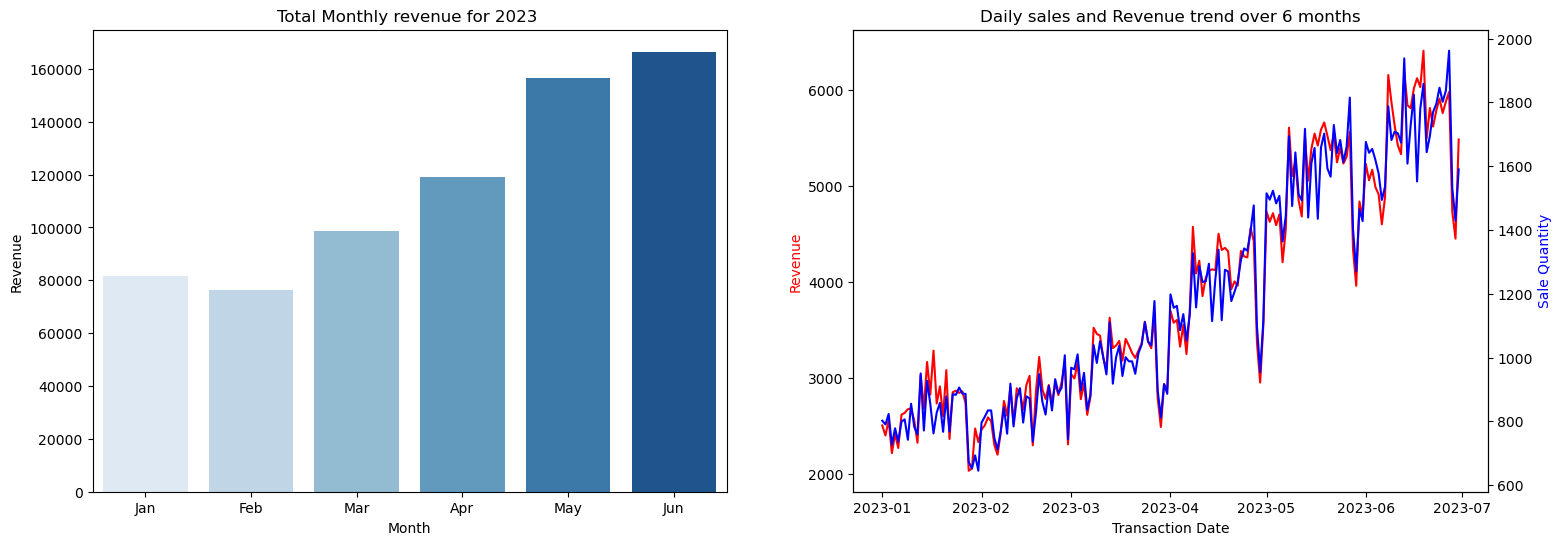

In [172]:
# highest revenue generated by month
month_rev = df.groupby(['Month'])['Revenue'].sum().reset_index()

#sorting by month
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']

month_rev['month_order'] = month_rev['Month'].map({Month: i for i,Month in enumerate(month_order)}) 
month_rev = month_rev.sort_values(by = 'month_order').drop('month_order',axis=1)

# daily revenue and quantity
daily_revenue = df.groupby('transaction_date')['Revenue'].sum().reset_index()
daily_qty = df.groupby('transaction_date')['transaction_qty'].sum().reset_index()

fig, (ax,ax0) = plt.subplots(1,2, figsize = (18,6))
sns.barplot(x = 'Month', y ='Revenue', data = month_rev, ax=ax, palette = 'Blues')
ax.set_title('Total Monthly revenue for 2023 ')


ax1 = ax0.twinx()
ax0.plot('transaction_date', 'Revenue', data=daily_revenue , color='red')
ax1.plot('transaction_date', 'transaction_qty', data=daily_qty, color='blue')
ax0.set_ylabel("Revenue", color='red')
ax0.set_xlabel('Transaction Date')
ax1.set_ylabel('Sale Quantity', color='blue')
plt.title('Daily sales and Revenue trend over 6 months')
plt.show()

* __Monthly Sales Trend:__ Sales and transaction volumes have been rising since February. More extended data could shed light on annual seasonality and potential sales limits.
* __Daily Sales Trend:__ Sales vary with weekdays, holidays, and promotions, with noticeable dips at the start and end of each month. The overall trend is positive, indicating business growth.

#### Looking for Weekday trends in revenue 

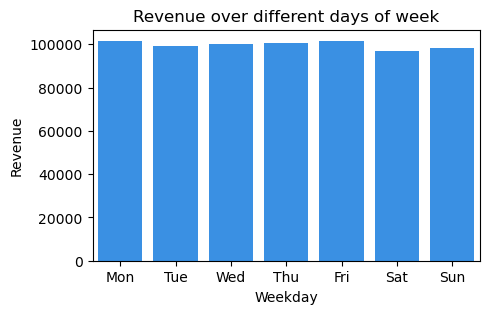

In [159]:
weekday_revenue = df.groupby('Weekday')['Revenue'].sum().reset_index()

# sorting based on the week
weekday_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
weekday_revenue['order'] = weekday_revenue['Weekday'].map({Weekday: i for i,Weekday in enumerate(weekday_order) }) 

weekday_revenue = weekday_revenue.sort_values(by='order').drop(columns='order')

plt.figure(figsize=(5,3))
sns.barplot(x=weekday_revenue['Weekday'], y = weekday_revenue['Revenue'], color = 'dodgerblue')
plt.title('Revenue over different days of week')
plt.show()

* The difference is very little over different days in a week

#### Let's look at the busiest time of the day

Text(0, 0.5, 'Average sales')

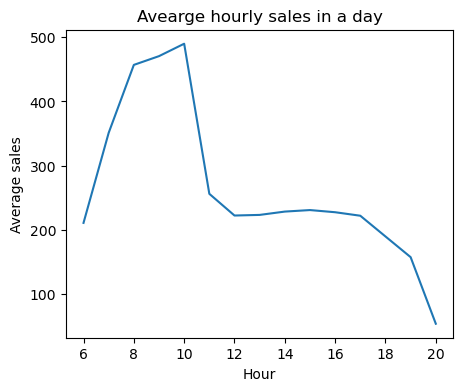

In [162]:
# calculating average sales over the day
total_sales_per_hour_of_day = df.groupby('Hour')['Revenue'].sum()
unique_dates = df.drop_duplicates(['transaction_date', 'Hour'])

# Counting how many times specific hours are recorded
hours_of_day_count = unique_dates['Hour'].value_counts(sort=True).sort_index(ascending=True)
avg_hourly_sales_per_day = total_sales_per_hour_of_day / hours_of_day_count

plt.figure(figsize=( 5,4))
plt.plot(avg_hourly_sales_per_day.index, avg_hourly_sales_per_day.values)
plt.title('Avearge hourly sales in a day')
plt.xlabel('Hour')
plt.ylabel('Average sales')

* Sales peak between 8 and 10 AM as people seek stimulating drinks to start their day. Sales become more evenly distributed from 11 AM to 7 PM.

* Sales during peak hours are twice as high as during regular hours. This insight can guide employee task allocation and marketing promotions to balance sales throughout the day.

### Multi variate Analysis

#### Lets see if there is a preferred product category across the three stores

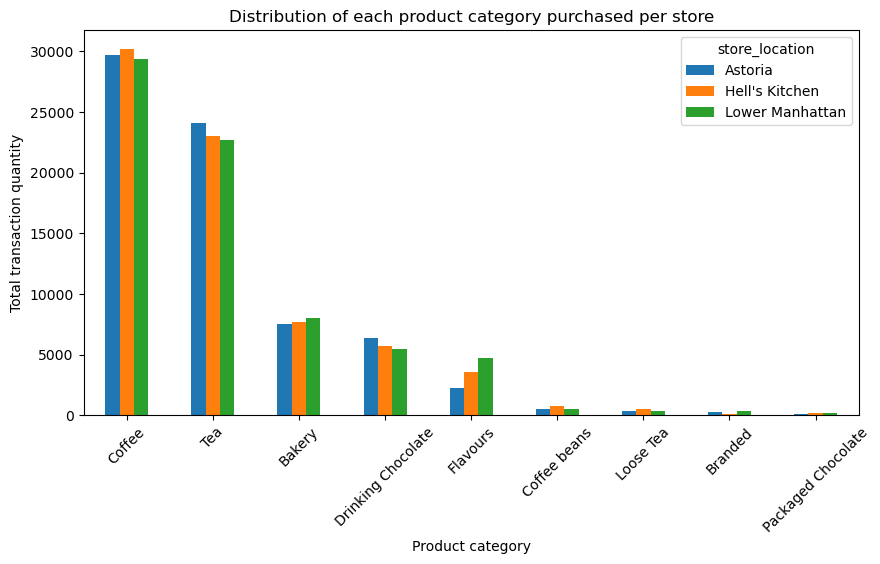

In [166]:

pivoted = df.pivot_table(index = 'product_category', columns='store_location', values='transaction_qty', aggfunc = 'sum')
pivoted['Total'] =  pivoted.sum(axis = 1)
pivoted.sort_values(by='Total', ascending = False, inplace = True)
pivoted.drop(columns = ['Total'], inplace = True)

pivoted.plot(kind='bar', figsize = (10,5))
plt.xticks(rotation = 45)
plt.xlabel('Product category')
plt.ylabel('Total transaction quantity')
plt.title('Distribution of each product category purchased per store')
plt.show()

* Across all three stores, most product categories exhibit similar purchase volumes, indicating that there are no clear favorites for specific product categories.

### Final Analysis:

* __Sales Consistency:__ All stores exhibit similar sales and transaction patterns, indicating uniform performance across locations.

* __Transaction Patterns:__ Customers predominantly purchase 1â€“2 items per transaction. Coffee and tea make up 70% of total purchases, while the five most expensive items account for less than 6% of sales.

* __Temporal Trends:__ Sales and transactions show consistent trends over time, with a slight cyclical increase towards the end of each month. There is no significant variation in daily sales by week day, but sales peak between 8 a.m. and 10 a.m., with a more moderate level of activity from 11 a.m. to 7 p.m.

* __Product Preferences:__ No specific product category preferences are observed across different stores, suggesting a uniform demand for product categories.

### Suggestions:

* __Encourage Larger Purchases:__ Since transactions generally involve 1â€“2 items, introduce group promotions or bundle offers to increase the average transaction size.

* __Optimize High-Price Items:__ Revise the product lineup or initiate specific marketing promotions for items with higher prices, to enhance their sales performance.

* __Maximize Busy Hours:__ Leverage the peak hours from 8 a.m. to 10 a.m. by introducing additional promotions. Adjust staffing schedules to balance the workload during these busy times and consider afternoon promotions to boost sales during the quieter hours from 11 a.m. to 7 p.m.

### Conclusion

The EDA reveals a strong customer preference for coffee and tea, which are the most popular categories, driving the majority of sales and demonstrating consistent demand. Sales trends indicate positive growth, with the potential to further increase revenue by focusing on these key items and implementing promotional strategies during non-peak hours. Addressing the performance of high-priced items through targeted marketing and product adjustments presents additional opportunities for growth. Overall, the data suggests a promising outlook for the coffee shop, with ample room for optimization and increased customer engagement.

55 days ago

55 days ago

55 days ago

55 days ago

55 days ago

56 days ago

56 days ago

56 days ago

56 days ago

57 days ago

57 days ago

57 days ago

57 days ago

57 days ago

58 days ago

58 days ago

58 days ago

58 days ago

58 days ago

58 days ago

58 days ago

59 days ago

59 days ago

59 days ago

59 days ago

59 days ago

59 days ago

59 days ago

59 days ago

60 days ago

60 days ago

60 days ago

60 days ago

60 days ago

61 days ago

61 days ago

61 days ago

61 days ago

61 days ago

61 days ago

62 days ago

62 days ago

62 days ago

62 days ago

62 days ago

62 days ago

62 days ago

63 days ago

63 days ago

63 days ago

63 days ago

63 days ago

63 days ago

64 days ago

64 days ago

64 days ago

64 days ago

64 days ago

64 days ago

65 days ago

65 days ago

65 days ago

65 days ago

65 days ago

65 days ago

65 days ago

66 days ago

66 days ago

66 days ago

66 days ago

66 days ago